Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.1  
Zadnji put ažurirano: 16. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić, Mladen Karan 

Objavljeno: **16. listopada 2017.**  
Rok za predaju: **23. listopada 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

#### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn import preprocessing
poly=sklearn.preprocessing.PolynomialFeatures(1)
m_design=poly.fit_transform(X)

#### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg

In [5]:
w1=np.dot(np.dot(linalg.inv(np.dot(np.transpose(m_design),m_design)),np.transpose(m_design)),y)
print w1
w2=np.dot(linalg.pinv(m_design),y)
print w2


[ 2.2         0.45714286]
[ 2.2         0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

#### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{x}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
h_x=np.dot(m_design,np.transpose(w1))
error=mean_squared_error(y,h_x)*0.5*len(h_x)
print error

4.08571428571


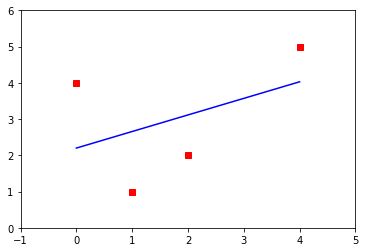

In [8]:
plt.xlim(-1,5)
plt.ylim(0,6)
plt.plot(X,y,'rs')
plt.plot(X,h_x,'b')

#### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [9]:
try:
    w=np.dot(np.linalg.inv(m_design),y)
except:
    print 'Nema inverza'

Nema inverza


#### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression().fit(m_design,y)
h_xsecond=lr.predict(m_design)
print h_x
print h_xsecond
print error
print mean_squared_error(y,h_xsecond)*0.5*len(h_xsecond)

[ 2.2         2.65714286  3.11428571  4.02857143]
[ 2.2         2.65714286  3.11428571  4.02857143]
4.08571428571
4.08571428571


### 2. Polinomijalna regresija i utjecaj šuma

#### (a)

Razmotrimo sada regresiju na većem broju primjera. Koristite funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma koristi se funkcija [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [12]:
from numpy.random import normal
def make_labels(X, f, noise=0) :
    return map(lambda x : f(x) + (normal(0,noise) if noise>0 else 0), X)

In [13]:
def make_instances(x1, x2, N) :
    return sp.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [14]:
def function(x):
    return 5+x-2*x*x-5*x*x*x
x=linspace(-5,5)
yi=make_labels(x,function,200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

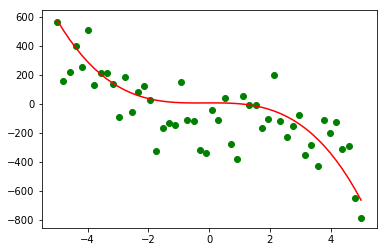

In [15]:
plt.scatter(x,yi,c='g')
plt.plot(x,function(x),'r')

#### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Pogreska ucenja modela je  564053.304809


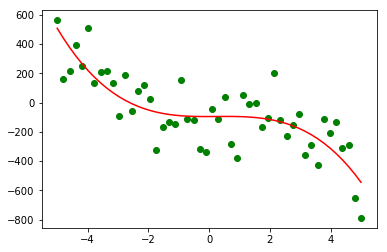

In [16]:
poly=sklearn.preprocessing.PolynomialFeatures(3)
m_design=poly.fit_transform(x.reshape(-1,1))
w=np.dot(np.linalg.pinv(m_design), yi)
h_x=np.dot(m_design,w)
plt.scatter(x,yi,c='g')
plt.plot(x,h_x,'r')
print 'Pogreska ucenja modela je ',mean_squared_error(h_x,yi)*0.5*len(h_x)

### 3. Odabir modela

#### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

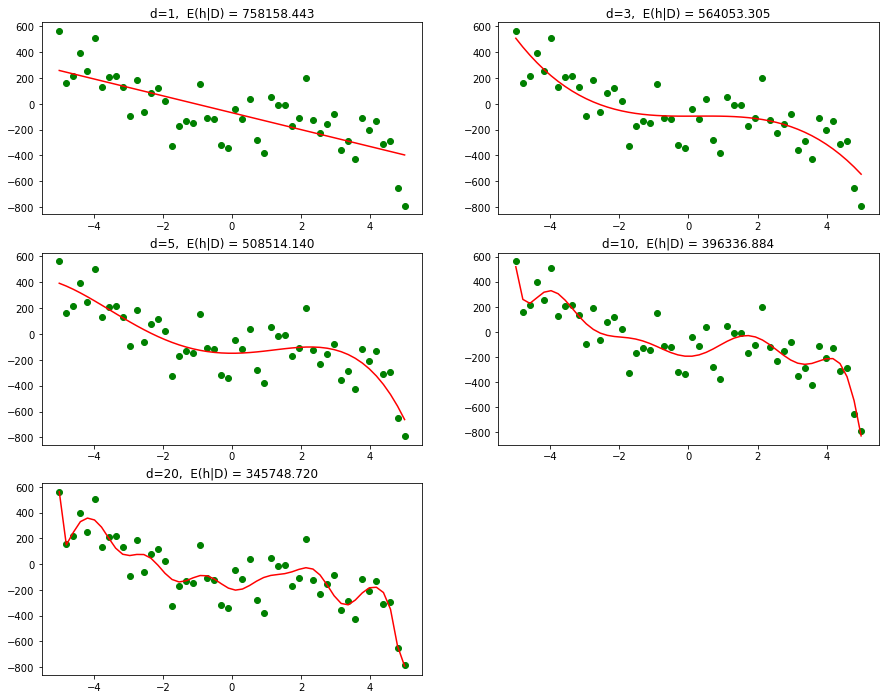

In [17]:
tezine=[]
greske=[]
hipoteze=[]
d=[1,3,5,10,20]
for i in range(5):
    tmp=sklearn.preprocessing.PolynomialFeatures(d[i]).fit_transform(x.reshape(-1,1))
    tezine.append(np.dot(np.linalg.pinv(tmp), yi))
    hipoteze.append(np.dot(tmp,tezine[i]))
    greske.append(mean_squared_error(yi,hipoteze[i])*0.5*len(hipoteze[i]))
plt.figure(figsize=(15,12))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.scatter(x,yi,c='g')
    plt.plot(x,hipoteze[i],'r')
    plt.title('d=%d,  E(h|D) = %.3f' % (d[i], greske[i]))
    


#### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Radi preciznosti, funkcije $h(\mathbf{x})$ iscrtajte na cijelom skupu primjera (ali pogrešku generalizacije računajte, naravno, samo na ispitnome skupu). Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [18]:
from sklearn import cross_validation

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


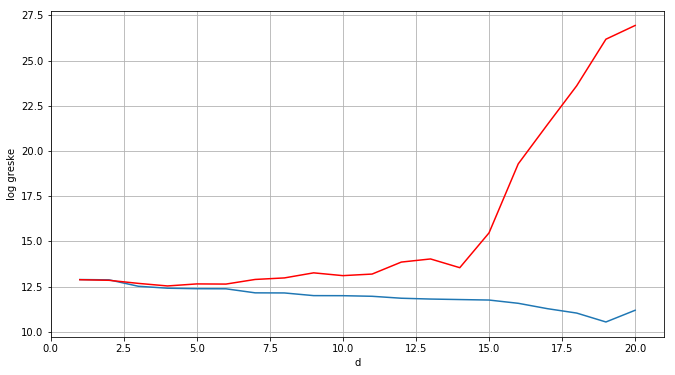

In [19]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, yi, test_size = 0.5)
greske_ucenja=[]
ispitne_greske=[]
for i in range(20):
    m_design_train=sklearn.preprocessing.PolynomialFeatures(i+1).fit_transform(X_train.reshape(-1,1))
    m_design_test=sklearn.preprocessing.PolynomialFeatures(i+1).fit_transform(X_test.reshape(-1,1))
    w=np.dot(np.linalg.pinv(m_design_train), y_train)
    h_train = np.dot(m_design_train,w)
    h_test = np.dot(m_design_test, w)
    greske_ucenja.append(np.log(mean_squared_error(y_train,h_train)*0.5*len(h_train)))
    ispitne_greske.append(np.log(mean_squared_error(y_test,h_test)*0.5*len(h_test)))
plt.figure(figsize=(11,6))
plt.xlim(0,21)
plt.grid()
plt.xlabel('d')
plt.ylabel('log greske')
plt.plot(range(1,21),greske_ucenja,range(1,21),ispitne_greske,'r')

#### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

In [20]:
import itertools

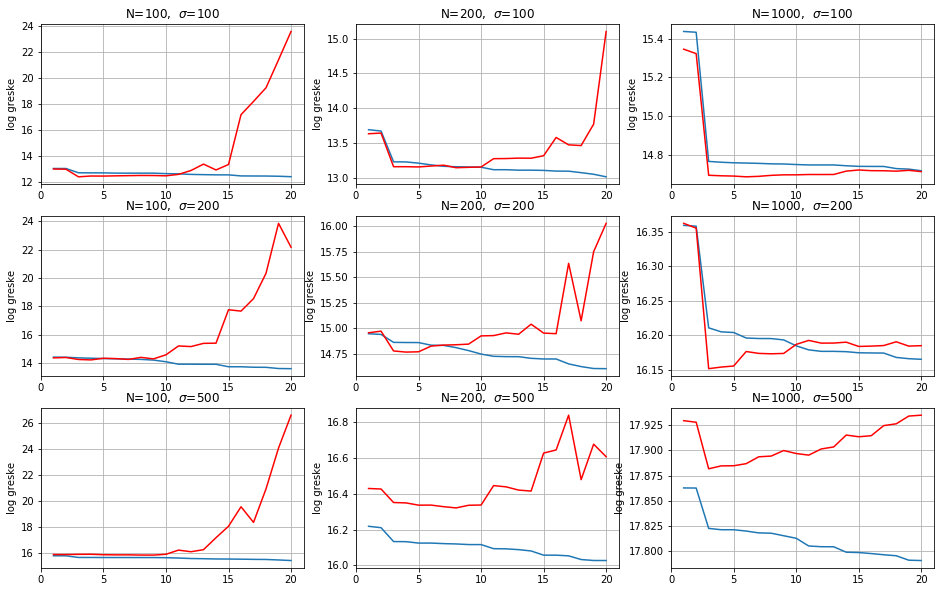

In [21]:
N = [100, 200, 1000];
sigma = [100, 200, 500];

X_trains = [];
X_tests = [];
y_trains = [];
y_tests = [];

x_tmp = np.linspace(-5, 5, 1000);
X_train, X_test = cross_validation.train_test_split(x_tmp, test_size = 0.5)

for i in range(3):
    y_tmp_train = make_labels(X_train, function, sigma[i])
    y_tmp_test = make_labels(X_test, function, sigma[i]) 
    for j in range(3):   
        X_trains.append(X_train[0:N[j]/2])
        X_tests.append(X_test[0:N[j]/2])
        y_trains.append(y_tmp_train[0:N[j]/2])
        y_tests.append(y_tmp_test[0:N[j]/2])
greske_ucenja=[]
ispitne_greske=[]
for i in range(9):
    greske_ucenja_this=[]
    ispitne_greske_this=[]
    for j in range(20):
        m_design_train=sklearn.preprocessing.PolynomialFeatures(j+1).fit_transform(X_trains[i].reshape(-1,1))
        m_design_test=sklearn.preprocessing.PolynomialFeatures(j+1).fit_transform(X_tests[i].reshape(-1,1))
        w=np.dot(np.linalg.pinv(m_design_train), y_trains[i])
        h_train = np.dot(m_design_train,w)
        h_test = np.dot(m_design_test, w)
        greske_ucenja_this.append(np.log(mean_squared_error(h_train,y_trains[i])*0.5*len(h_train)))
        ispitne_greske_this.append(np.log(mean_squared_error(h_test,y_tests[i])*0.5*len(h_test)))
    greske_ucenja.append(greske_ucenja_this)
    ispitne_greske.append(ispitne_greske_this)
fig = plt.figure(figsize=(16, 10))
models=[i for i in itertools.product([100, 200, 500],[100, 200, 1000])]
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xlim(0,21)
    plt.grid()
    plt.ylabel('log greske')
    plt.plot(range(1,21),greske_ucenja[i],range(1,21),ispitne_greske[i],'r')
    plt.title('N=%d,  $\sigma$=%d' % (models[i][1], models[i][0]) )
    

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

#### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [22]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
lambde=[0,1,10]
I=np.eye(4)
I[0][0]=0
m_design=sklearn.preprocessing.PolynomialFeatures(3).fit_transform(X)
for i in range(3):
    print np.dot(np.dot(np.linalg.inv(np.add(np.dot(np.transpose(m_design),m_design),np.dot(lambde[i],I))), \
                        np.transpose(m_design)),y)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


#### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [23]:
from sklearn.linear_model import Ridge

In [24]:
for i in range(3):
    ridge=Ridge(alpha=lambde[i]).fit(m_design,y)
    print [ridge.intercept_,ridge.coef_[1],ridge.coef_[2],ridge.coef_[3]]

[4.0000000000000249, -5.9166666666667647, 3.3750000000000528, -0.45833333333334048]
[3.0569614512471643, -0.69079365079365218, -0.28317460317460036, 0.14458049886621255]
[2.4944418431229729, -0.15897294873414738, -0.13423066536848341, 0.081560099197058783]


### 5. Regularizirana polinomijalna regresija

#### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

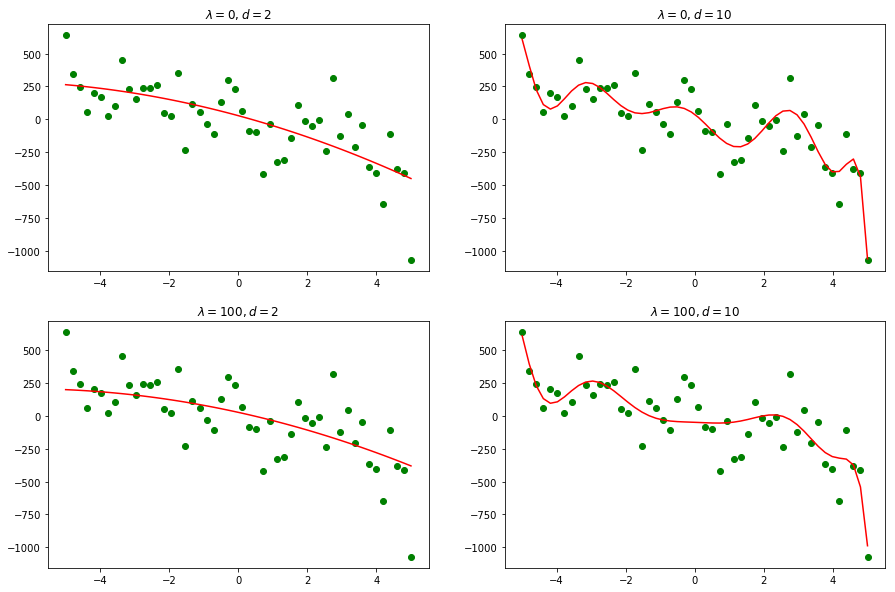

In [25]:
x=np.linspace(-5,5)
yi=make_labels(x,function,200)
models=[i for i in itertools.product([0,100],[2,10])]
plt.figure(figsize=(15, 10))
for i,model in enumerate(models):
    poly=sklearn.preprocessing.PolynomialFeatures(model[1])
    m_design=poly.fit_transform(x.reshape(-1,1))
    ridge=Ridge(alpha=model[0]).fit(m_design,yi)
    h_x=ridge.predict(m_design)
    plt.subplot(2,2,i+1)
    plt.title('$\lambda=%d, d=%d $' % (model[0],model[1]) )
    plt.scatter(x,yi,c='g')
    plt.plot(x,h_x,'r')

#### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=20,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


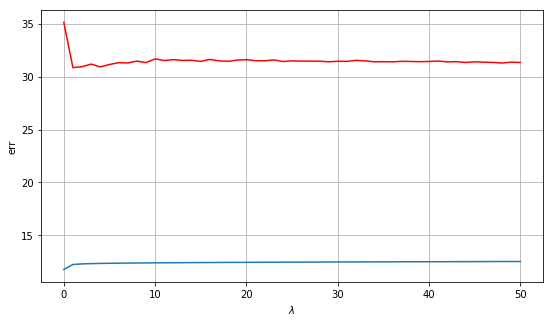

In [26]:
greske_ucenja=[]
ispitne_greske=[]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, yi, test_size = 0.5)
for i in range(51):
    poly=sklearn.preprocessing.PolynomialFeatures(20)
    m_design_train=poly.fit_transform(X_train.reshape(-1,1))
    m_design_test=poly.fit_transform(X_test.reshape(-1,1))
    ridge=Ridge(alpha=i).fit(m_design_train,y_train)
    h_xtrain=ridge.predict(m_design_train)
    h_xtest=ridge.predict(m_design_test)
    greske_ucenja.append(np.log(mean_squared_error(h_xtrain,y_train)*0.5*len(h_xtrain)))
    ispitne_greske.append(np.log(mean_squared_error(h_xtest,y_test)*0.5*len(h_xtest)))
plt.figure(figsize=(9,5))
plt.grid()
plt.plot(range(51),greske_ucenja,range(51),ispitne_greske,'r')
plt.xlabel('$\lambda$')
plt.ylabel('err');

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije:

In [27]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[sp.isclose(0, coef, atol=tol)])

#### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=20$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [28]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

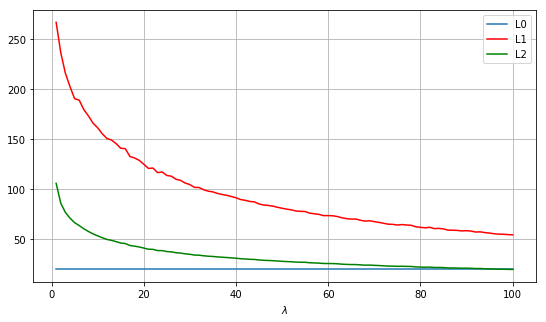

In [29]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, yi, test_size = 0.5)
m_design=sklearn.preprocessing.PolynomialFeatures(20).fit_transform(X_train.reshape(-1,1))
L0_norms = []
L1_norms = []
L2_norms = []

def L1norm(w):
    return sum(abs(w))
def L2norm(w):
    return math.sqrt(np.dot(w.T, w));

for i in range(1,101):
    ridge=Ridge(alpha=i).fit(m_design,y_train)
    w=ridge.coef_
    L0_norms.append(nonzeroes(w))
    L1_norms.append(L1norm(w))
    L2_norms.append(L2norm(w))

plt.figure(figsize=(9,5))
plot(range(1,101), L0_norms, range(1,101), L1_norms,'r', range(1,101), L2_norms,'g' );
plt.legend(['L0', 'L1', 'L2'], loc = 'best')
plt.grid()
plt.xlabel('$\lambda$');
    

#### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

C:\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


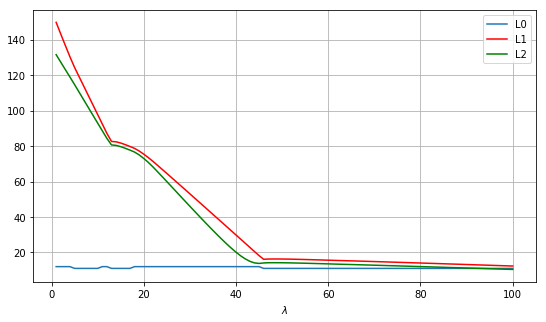

In [30]:
L0_norms = []
L1_norms = []
L2_norms = []

for i in range(1,101):
    lasso=Lasso(alpha=i).fit(m_design,y_train)
    w=lasso.coef_
    L0_norms.append(nonzeroes(w))
    L1_norms.append(L1norm(w))
    L2_norms.append(L2norm(w))

plt.figure(figsize=(9,5))
plot(range(1,101), L0_norms, range(1,101), L1_norms,'r', range(1,101), L2_norms,'g' );
plt.legend(['L0', 'L1', 'L2'], loc = 'best')
plt.grid()
plt.xlabel('$\lambda$');

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [31]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)**

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

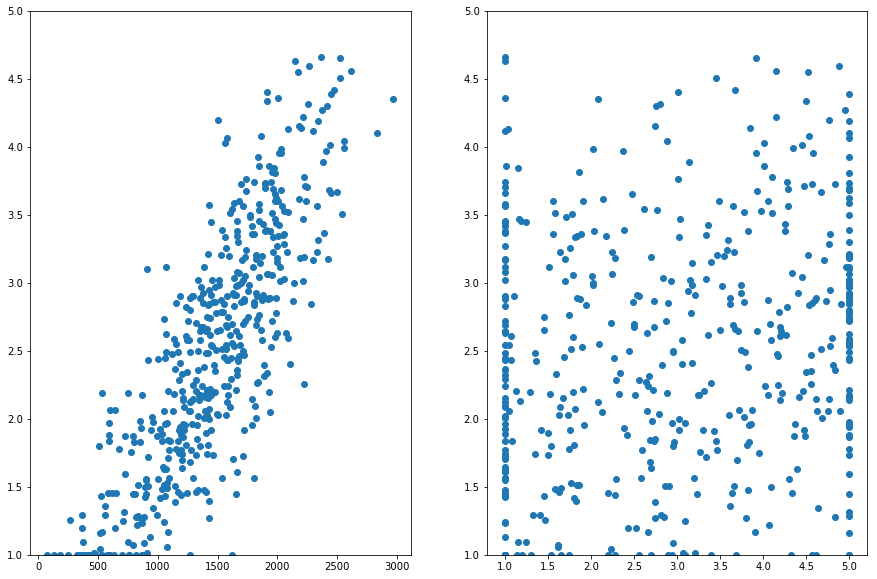

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.ylim(1,5)
plt.scatter(exam_score,grades_y)
plt.subplot(122)
plt.ylim(1,5)
plt.scatter(grade_in_highschool,grades_y)

**b)**

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [33]:
ridge = Ridge(alpha=0.01).fit(grades_X, grades_y)
print ridge.intercept_, ridge.coef_

0.150611795758 [ 0.00141497  0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X,grades_y)
ridge = Ridge(alpha=0.01).fit(grades_X_fixed, grades_y)
print ridge.intercept_, ridge.coef_


2.50303163599 [ 0.73954683  0.13741539]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)**

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka 7b duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [36]:
grades_X_fixed_colinear = np.c_[grades_X_fixed, grades_X_fixed[:, 1]]

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [37]:
ridge = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y)
print ridge.intercept_, ridge.coef_

2.50303163599 [ 0.73954673  0.06870839  0.06870839]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)**

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$, a jedan s $\lambda=1000$. Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [38]:
w1=[]
w2=[]
for i in range(10):
    x1,x2,y1,y2 = cross_validation.train_test_split(grades_X_fixed_colinear,grades_y,test_size = 0.5)
    ridge1 = Ridge(alpha=0.01).fit(x1, y1)
    ridge2 = Ridge(alpha=1000).fit(x1, y1)
    w1.append([ridge1.intercept_, ridge1.coef_[0],ridge1.coef_[1],ridge1.coef_[2]])
    w2.append([ridge2.intercept_,ridge2.coef_[0],ridge2.coef_[1],ridge2.coef_[2]])
w1=np.array(w1)
print 'Tezine za lambda=0.01:'
for i in w1:
    print i
print 'Standardne devijacije za w0,w1,w2:',np.std(w1[:,0]),np.std(w1[:,1]),np.std(w1[:,2])
print '\n'
w2=np.array(w2)
print 'Tezine za lambda=1000:'
for i in w2:
    print i
print 'Standardne devijacije za w0,w1,w2:',np.std(w2[:,0]),np.std(w2[:,1]),np.std(w2[:,2])
    

Tezine za lambda=0.01:
[ 2.49355825  0.71920557  0.05892704  0.05892704]
[ 2.52252867  0.73147134  0.06895112  0.06895112]
[ 2.51137967  0.73760284  0.06951859  0.06951859]
[ 2.48653792  0.75435652  0.06779841  0.06779841]
[ 2.51446443  0.72238097  0.07260145  0.07260145]
[ 2.50559652  0.74149514  0.0409969   0.0409969 ]
[ 2.46177705  0.72555863  0.05567666  0.05567666]
[ 2.51083392  0.73579711  0.06023195  0.06023195]
[ 2.49218079  0.73838298  0.04026645  0.04026645]
[ 2.48691312  0.74222475  0.06744017  0.06744017]
Standardne devijacije za w0,w1,w2: 0.0170024352431 0.00998987667195 0.011025157958


Tezine za lambda=1000:
[ 2.48174234  0.14890855  0.0345435   0.0345435 ]
[ 2.53213245  0.14488565  0.02188302  0.02188302]
[ 2.47946072  0.14611719  0.02461645  0.02461645]
[ 2.45803751  0.15020984  0.03085084  0.03085084]
[ 2.48034026  0.14226771  0.02414177  0.02414177]
[ 2.5184904   0.16156482  0.02888502  0.02888502]
[ 2.45406696  0.14100268  0.02036078  0.02036078]
[ 2.52460227  0.146

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)**

Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_fixed_X_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.

In [39]:
print(np.linalg.cond(np.dot(np.transpose(grades_X_fixed_colinear), grades_X_fixed_colinear) \
                     + 0.01 * np.eye(shape(grades_X_fixed_colinear)[1])))
print(np.linalg.cond(np.dot(np.transpose(grades_X_fixed_colinear), grades_X_fixed_colinear) \
                     + 10 * np.eye(shape(grades_X_fixed_colinear)[1])))

100542.866535
101.541866535


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  